In [1]:
library(GLMsData)

In [2]:
data(trees)

In [3]:
trees

Girth,Height,Volume
8.3,70,10.3
8.6,65,10.3
8.8,63,10.2
10.5,72,16.4
10.7,81,18.8
10.8,83,19.7
11.0,66,15.6
11.0,75,18.2
11.1,80,22.6
11.2,75,19.9


In [4]:
m.naive <- glm( Volume ~ Girth + Height, data=trees, family=Gamma)

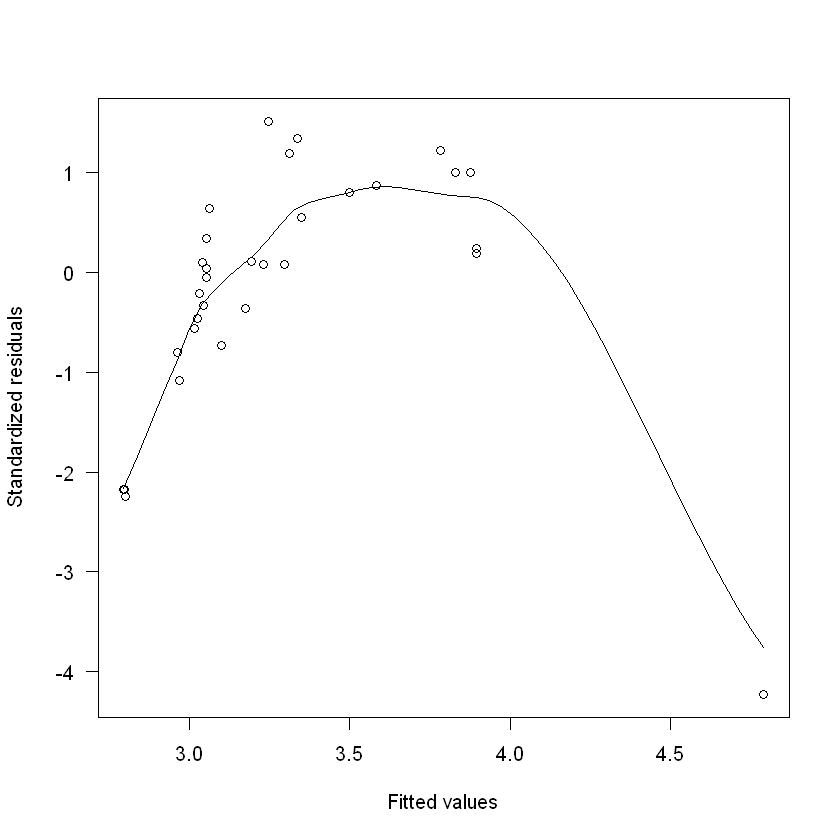

In [5]:
scatter.smooth( rstandard(m.naive) ~ log(fitted(m.naive)), las=1,
xlab="Fitted values", ylab="Standardized residuals")

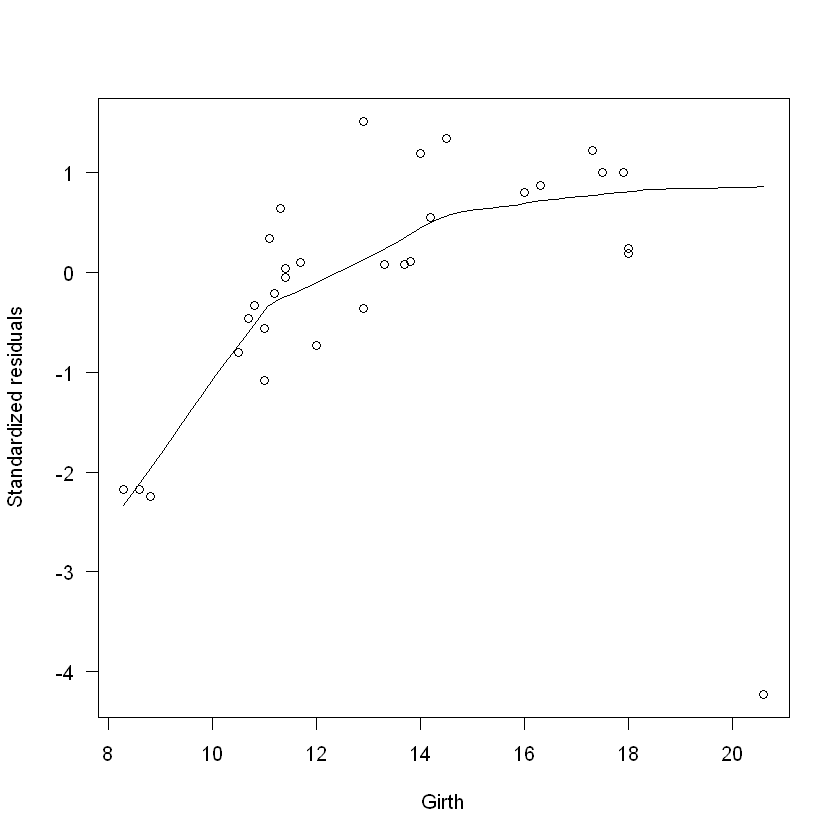

In [6]:
scatter.smooth( rstandard(m.naive) ~ trees$Girth, las=1,
xlab="Girth", ylab="Standardized residuals")

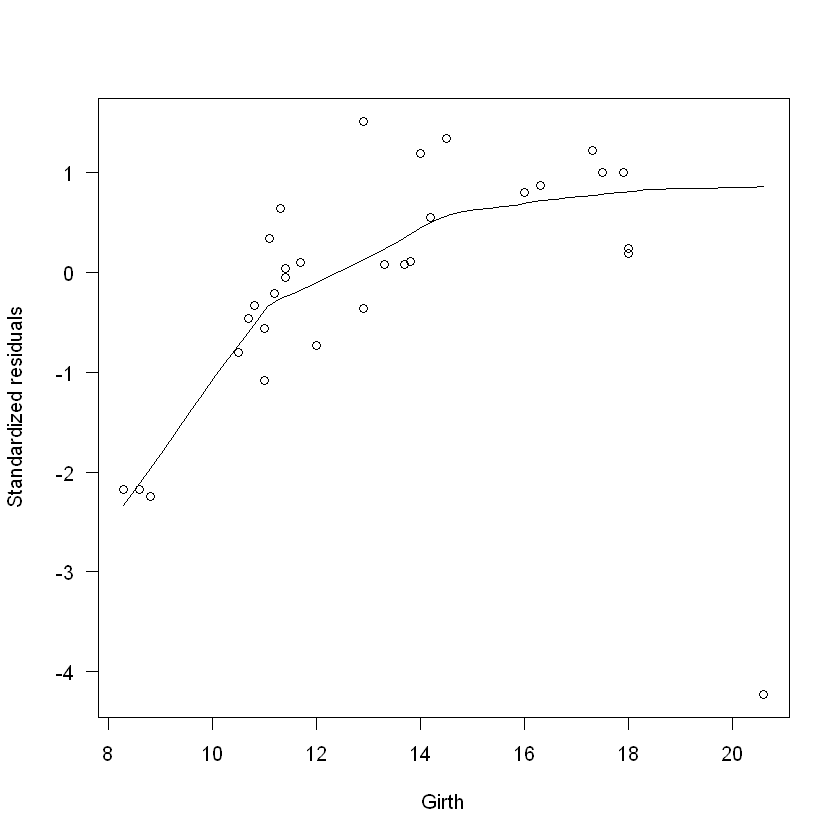

In [7]:
scatter.smooth( rstandard(m.naive) ~ trees$Girth, las=1,
xlab="Girth", ylab="Standardized residuals")

In [9]:
eta <- m.naive$linear.predictor

In [10]:
eta

1           2           3           4           5           6 
0.060820897 0.060986823 0.060741228 0.051707533 0.048523188 0.047598913 
          7           8           9          10          11          12 
0.051360705 0.048956273 0.047230520 0.048176359 0.046717766 0.047129287 
         13          14          15          16          17          18 
0.047129287 0.047829531 0.045056707 0.041814256 0.038875506 0.037048520 
         19          20          21          22          23          24 
0.039496081 0.040976238 0.036456097 0.035141865 0.035574950 0.030259920 
         25          26          27          28          29          30 
0.027754254 0.022786051 0.021738979 0.020713471 0.020323514 0.020323514 
         31 
0.008314528

In [11]:
z <- resid(m.naive, type="working") + eta

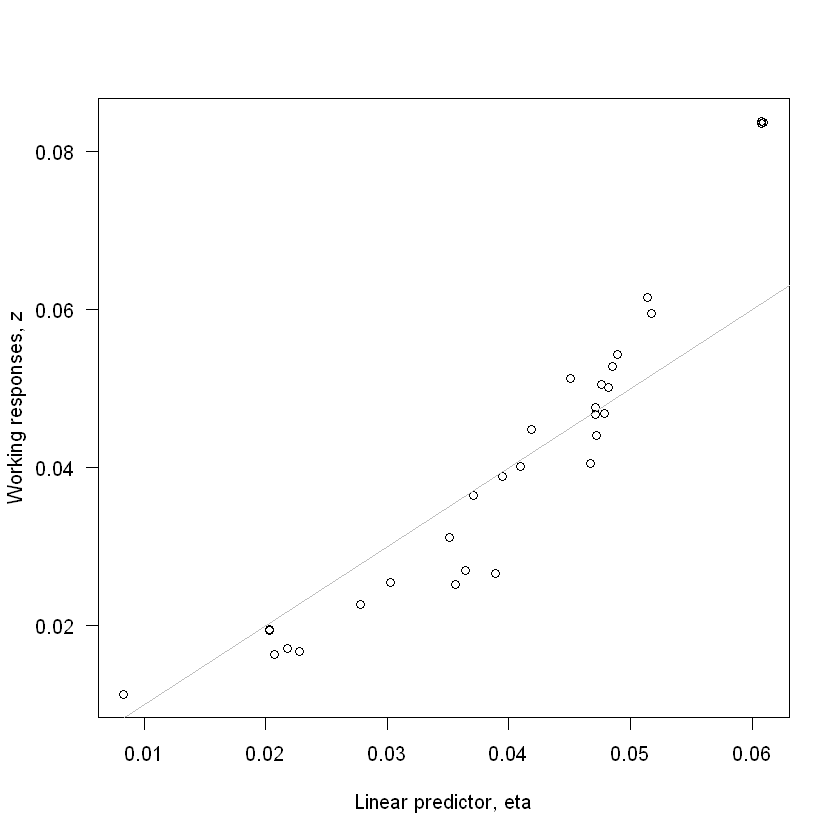

In [14]:

plot( z ~ eta, las=1,
xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")

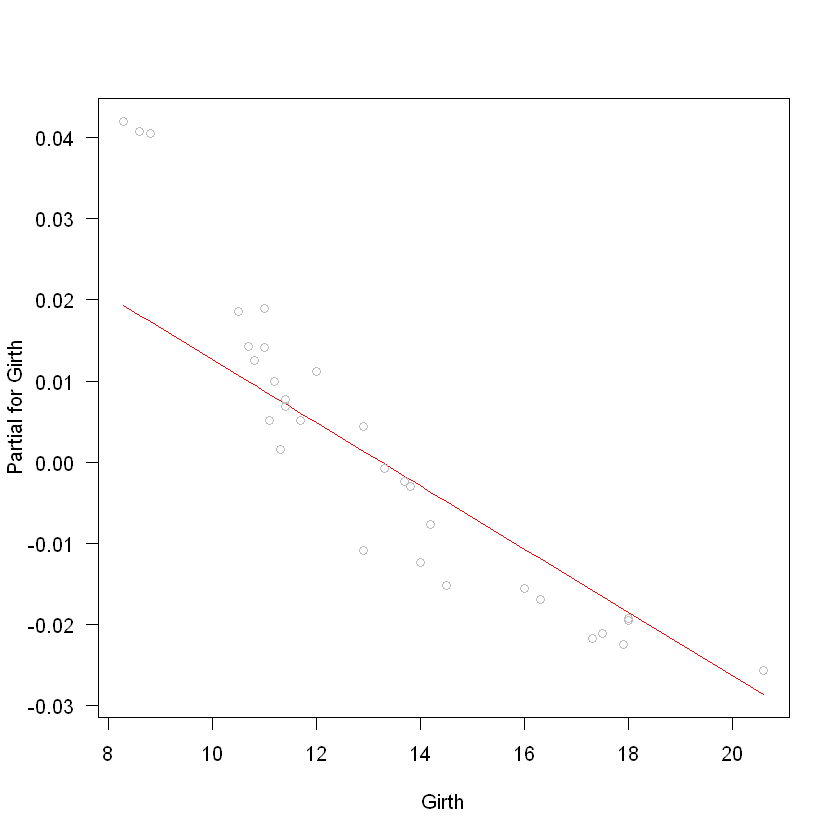

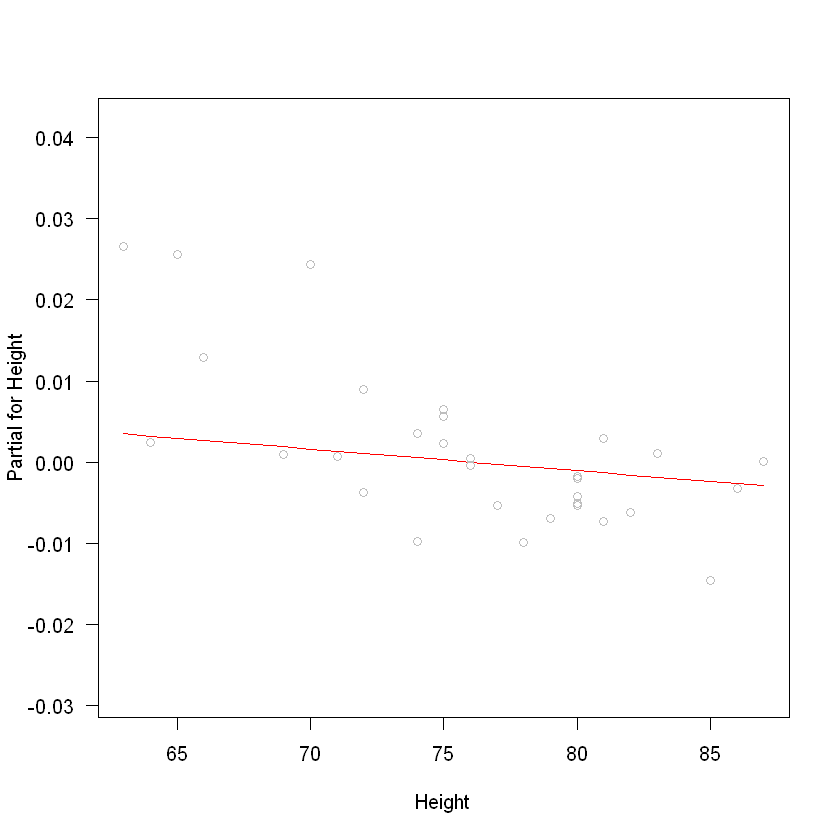

In [15]:
termplot(m.naive, partial.resid=TRUE, las=1)

In [16]:
m.better <- update(m.naive, family=Gamma(link="log"))

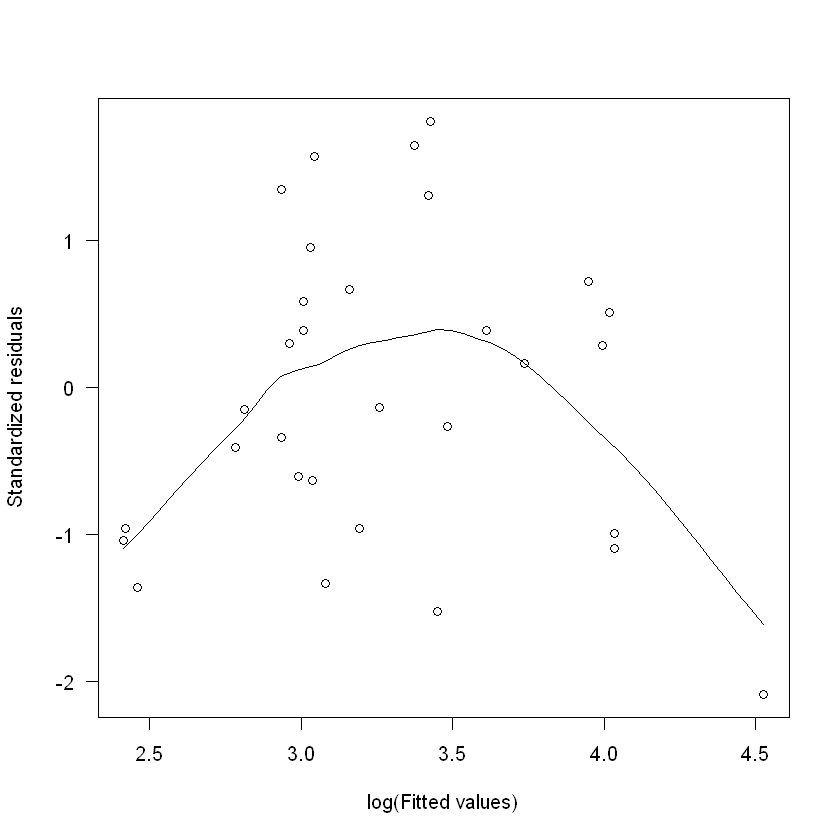

In [17]:
scatter.smooth( rstandard(m.better) ~ log(fitted(m.better)), las=1,
xlab="log(Fitted values)", ylab="Standardized residuals")

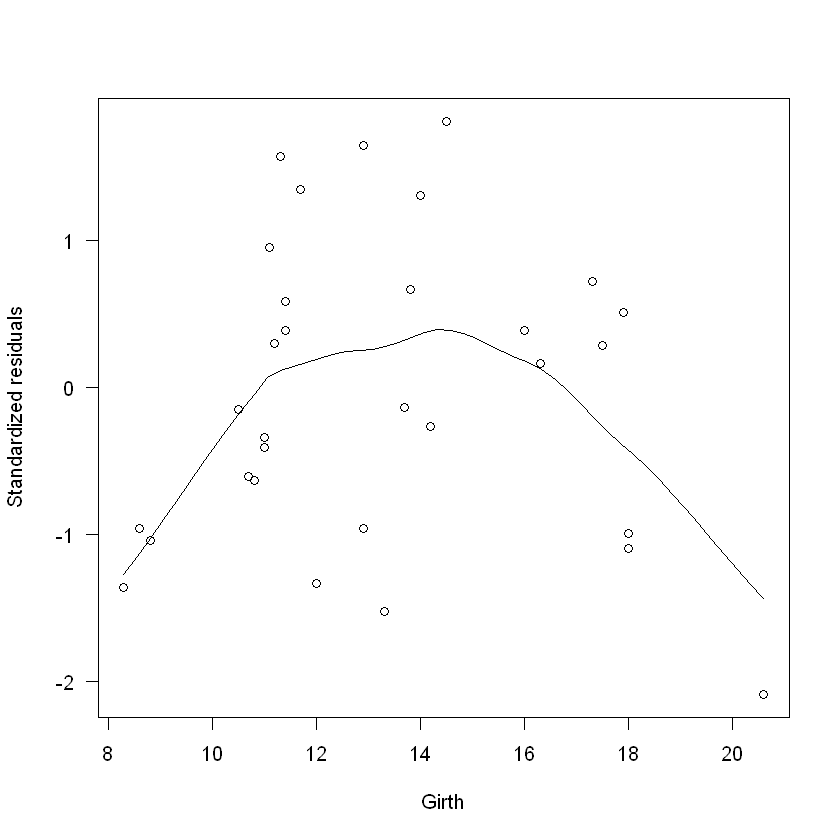

In [18]:
scatter.smooth( rstandard(m.better) ~ trees$Girth, las=1,
xlab="Girth", ylab="Standardized residuals")

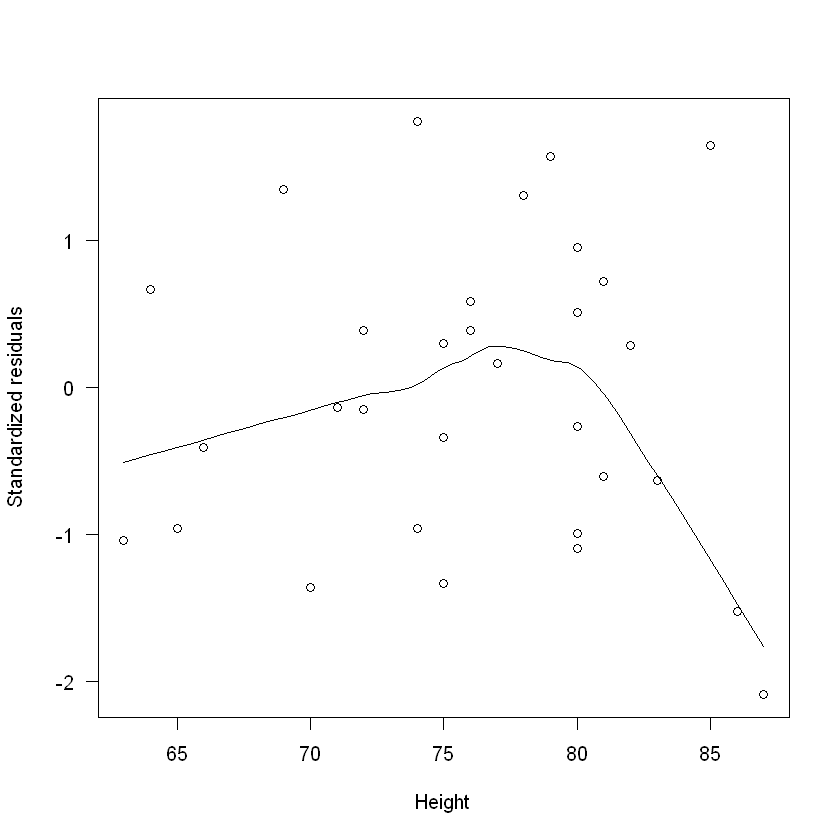

In [19]:
scatter.smooth( rstandard(m.better) ~ trees$Height, las=1,
xlab="Height", ylab="Standardized residuals")

In [20]:
eta <- m.better$linear.predictor

In [21]:
z <- resid(m.better, type="working") + eta

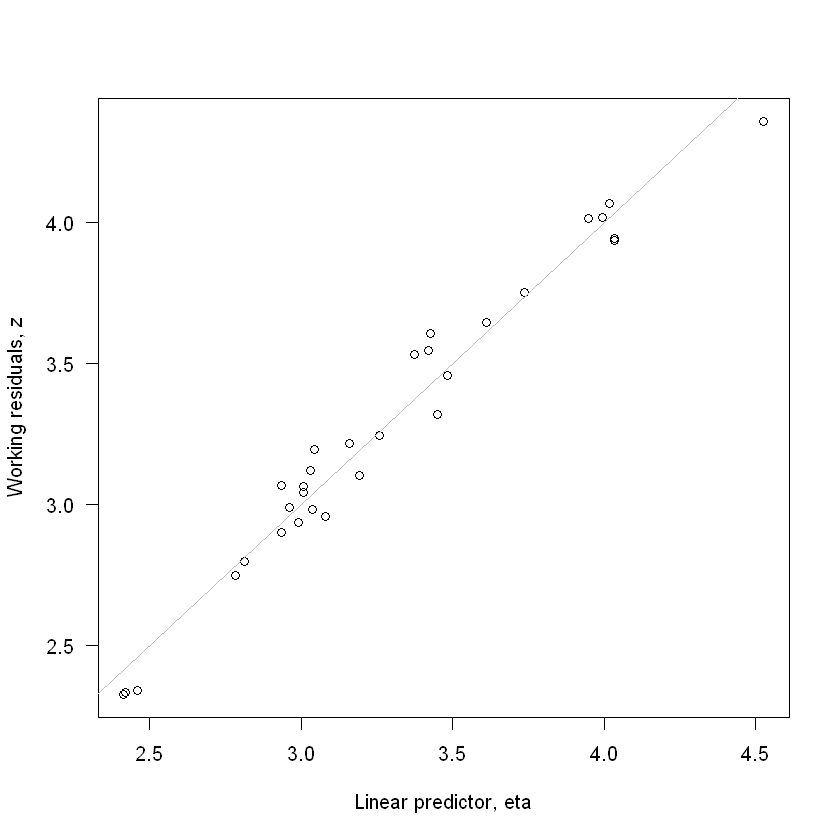

In [23]:
plot( z ~ eta, las=1, las=1,
xlab="Linear predictor, eta", ylab="Working residuals, z")
abline(0, 1, col="grey")

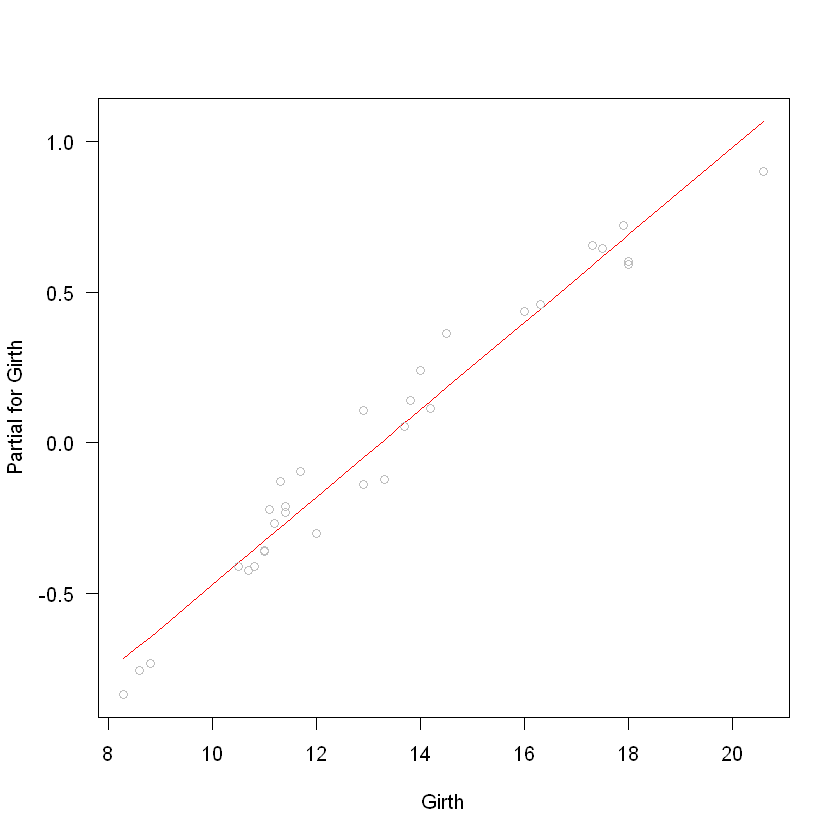

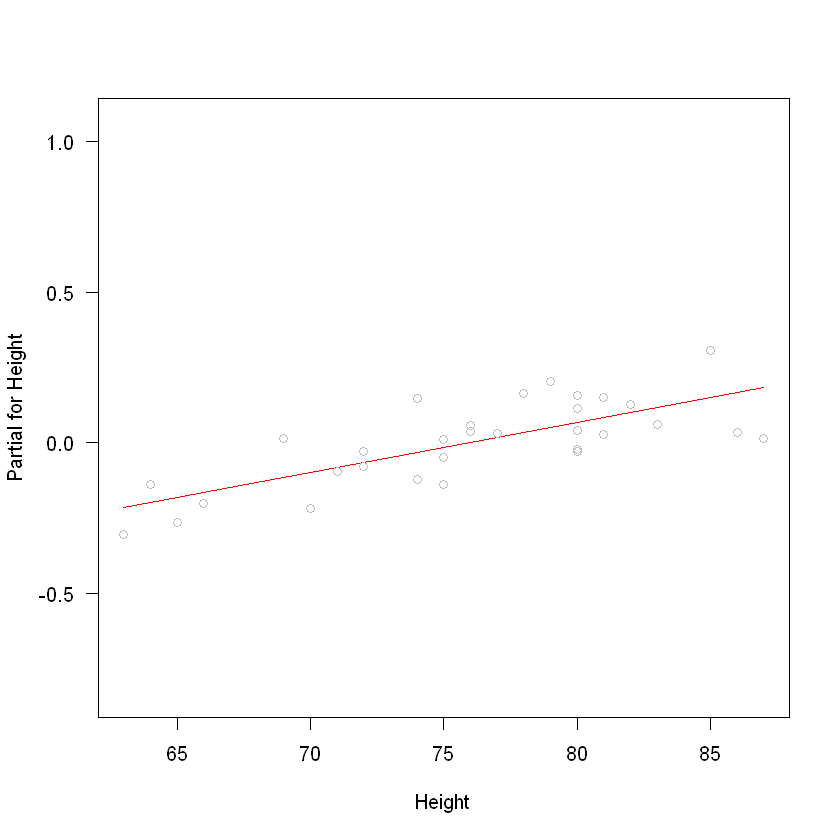

In [24]:
termplot(m.better, partial.resid=TRUE, las=1)